In [1]:
# Add necessary libraries
!pip install chembl_webresource_client
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.9 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=49a8c7fae0c15f2709b1b82c3bc4a491d805c3891d68404779b9979a0dd541a1
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4
    Uninstalling networkx-3.4:
      Successfully uninstalled networkx-3.4


In [16]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

In [17]:
# Upload GDSC1 dataset excel file
from google.colab import files
uploaded = files.upload()

Saving GDSC1_fitted_dose_response_27Oct23.xlsx to GDSC1_fitted_dose_response_27Oct23.xlsx


In [18]:
# Create DataFrame for GDSC1_fitted_dose_response_27Oct23.xlsx
import io
df = pd.read_excel(io.BytesIO(uploaded['GDSC1_fitted_dose_response_27Oct23.xlsx']))

In [19]:
# View DataFrame
df.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


In [20]:
df

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333156,GDSC1,342,15911377,1659823,SNU-1040,SIDM00217,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.085294,0.972251,0.040661,0.860626
333157,GDSC1,342,15912122,1660035,SNU-61,SIDM00194,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.725399,0.976109,0.045453,1.785602
333158,GDSC1,342,15912431,1660036,SNU-81,SIDM00193,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.930753,0.970851,0.038612,0.637308
333159,GDSC1,342,15912739,1674021,SNU-C5,SIDM00498,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.551784,0.972330,0.042649,0.089683


In [21]:
# Sort the table in the CELL_LINE_NAME column
df.sort_values(by='CELL_LINE_NAME', inplace=True)

In [22]:
# Filter the DataFrame to include only rows where 'CELL_LINE_NAME' is 'SK-MEL-2'
df_filtered = df[df['CELL_LINE_NAME'] == 'SK-MEL-2']

In [24]:
# Sort the filtered DataFrame by AUC in ascending order (if needed)
df_filtered.sort_values(by='AUC', inplace=True)

In [25]:
# Print the sorted DataFrame
print(df_filtered)

       DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
139182   GDSC1             342       15646606     905955       SK-MEL-2   
280946   GDSC1             342       15646407     905955       SK-MEL-2   
140973   GDSC1             342       15646608     905955       SK-MEL-2   
123728   GDSC1             342       15646585     905955       SK-MEL-2   
252207   GDSC1             342       15646366     905955       SK-MEL-2   
...        ...             ...            ...        ...            ...   
282688   GDSC1             342       15646409     905955       SK-MEL-2   
267436   GDSC1             342       15646386     905955       SK-MEL-2   
263817   GDSC1             342       15646382     905955       SK-MEL-2   
268332   GDSC1             342       15646387     905955       SK-MEL-2   
251447   GDSC1             342       15646365     905955       SK-MEL-2   

       SANGER_MODEL_ID TCGA_DESC  DRUG_ID     DRUG_NAME  \
139182       SIDM00082      SKCM      37

In [26]:
# Select only the desired columns
df_filtered = df_filtered[['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'LN_IC50']]
print(df_filtered)

       CELL_LINE_NAME TCGA_DESC     DRUG_NAME   LN_IC50
139182       SK-MEL-2      SKCM       Torin 2 -3.615950
280946       SK-MEL-2      SKCM    Trametinib -5.920752
140973       SK-MEL-2      SKCM    GSK1059615 -2.653297
123728       SK-MEL-2      SKCM    WYE-125132 -2.851759
252207       SK-MEL-2      SKCM        torin2 -2.830939
...               ...       ...           ...       ...
282688       SK-MEL-2      SKCM  Temozolomide  6.983134
267436       SK-MEL-2      SKCM       UNC1215  3.674801
263817       SK-MEL-2      SKCM  N24798-49-A1  6.006538
268332       SK-MEL-2      SKCM       UNC0642  3.053044
251447       SK-MEL-2      SKCM     Tamoxifen  5.363416

[402 rows x 4 columns]


In [27]:
import requests
import pandas as pd
import time

In [28]:
# Get CID from PubChem using drug name
def get_cid(drug_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/cids/TXT"
    response = requests.get(url)
    if response.status_code != 200:
        return None
    else:
      return response.text.strip()

In [29]:
# Get the canonical SMILES from PubChem for a given CID
def get_canonical_smiles(cid):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/TXT"
    response = requests.get(url)
    if response.status_code != 200:
        return None
    else:
      return response.text.strip()

In [30]:
# List of drug names from the provided list
drug_names = df_filtered['DRUG_NAME'].tolist()
print(drug_names)

['Torin 2', 'Trametinib', 'GSK1059615', 'WYE-125132', 'torin2', 'Thapsigargin', 'FY012', 'AZD7762', 'QL-VIII-58', 'Obatoclax Mesylate', 'ZL109', 'Sepantronium bromide', 'Doxorubicin', 'Apitolisib', 'IMD-0354', 'FY026', 'ARRY-520', '(5Z)-7-Oxozeaenol', 'Panobinostat', 'Lestaurtinib', 'Daporinad', 'AZD4877', 'HG-6-71-01', 'PLK_6522', 'Refametinib', 'FH535', 'THZ-1-87', 'ACY-1215', 'Vinblastine', 'AZD7762', 'Refametinib', 'Tipifarnib', 'NSC319726', 'Selumetinib', 'TW 37', 'Flavopiridol', 'OSI-027', 'AST-1306', 'LDN-193189', 'AT-7519', 'CI-1033', 'Tanespimycin', 'Dacinostat', 'Vorinostat', 'FS106', 'CD532', 'PD0325901', 'CI-1040', 'MIM1', 'Bleomycin', 'AZ20', 'BMS-754807', 'Vinorelbine', 'BAY-HDAC11_1', 'AZD2014', 'Belinostat', 'Omipalisib', 'IGFR_3801', 'QL-XII-47', 'AR-42', 'Shikonin', 'JNK-9L', 'Elesclomol', 'AZD5438', 'AZD5582', 'AZD6738', 'Bleomycin (50 uM)', 'BAY-61-3606', 'RAF_9304', 'ZG-10', 'Gemcitabine', 'Epothilone B', 'SN-38', 'Docetaxel', 'kb NB 142-70', 'YK-4-279', 'Doxorubic

In [31]:
num_rows = len(drug_names)
print(num_rows)

402


In [32]:
# Prepare a list to hold the results
results = []

In [33]:
# Loop over each drug name to get its CID and then its canonical SMILES
for drug_name in drug_names:
  cid = get_cid(drug_name)
  if cid:
        canonical_smiles = get_canonical_smiles(cid)
        if canonical_smiles:
            results.append((drug_name, cid, canonical_smiles))
        else:
            results.append((drug_name, cid, None))
  else:
        results.append((drug_name, None, None))

In [34]:
# Create a pandas DataFrame from the results
df_results = pd.DataFrame(results, columns=['Drug Name', 'CID', 'Canonical SMILES'])

In [35]:
df_results

,Drug Name,CID,Canonical SMILES
0,Torin 2,51358113,C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...
1,Trametinib,11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...
2,GSK1059615,23582824,C1=CC2=NC=CC(=C2C=C1C=C3C(=O)NC(=O)S3)C4=CC=NC=C4
3,WYE-125132,25260757,CNC(=O)NC1=CC=C(C=C1)C2=NC3=C(C=NN3C4CCC5(CC4)...
4,torin2,51358113,C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...
...,...,...,...
397,Temozolomide,5394,CN1C(=O)N2C=NC(=C2N=N1)C(=O)N
398,UNC1215,57339144,C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4C...
399,N24798-49-A1,None,None
400,UNC0642,53315878,CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCC...


In [36]:
df_results = df_results[df_results['Canonical SMILES'].notna()]
df_results

,Drug Name,CID,Canonical SMILES
0,Torin 2,51358113,C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...
1,Trametinib,11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...
2,GSK1059615,23582824,C1=CC2=NC=CC(=C2C=C1C=C3C(=O)NC(=O)S3)C4=CC=NC=C4
3,WYE-125132,25260757,CNC(=O)NC1=CC=C(C=C1)C2=NC3=C(C=NN3C4CCC5(CC4)...
4,torin2,51358113,C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...
...,...,...,...
396,I-CBP112,90488984,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...
397,Temozolomide,5394,CN1C(=O)N2C=NC(=C2N=N1)C(=O)N
398,UNC1215,57339144,C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4C...
400,UNC0642,53315878,CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCC...


In [37]:
# Concatenate df_filtered and df_results
df_merged = pd.merge(df_filtered, df_results, left_on='DRUG_NAME', right_on='Drug Name', how='inner')
print(df_merged)

    CELL_LINE_NAME TCGA_DESC     DRUG_NAME   LN_IC50     Drug Name       CID  \
0         SK-MEL-2      SKCM       Torin 2 -3.615950       Torin 2  51358113   
1         SK-MEL-2      SKCM    Trametinib -5.920752    Trametinib  11707110   
2         SK-MEL-2      SKCM    GSK1059615 -2.653297    GSK1059615  23582824   
3         SK-MEL-2      SKCM    WYE-125132 -2.851759    WYE-125132  25260757   
4         SK-MEL-2      SKCM        torin2 -2.830939        torin2  51358113   
..             ...       ...           ...       ...           ...       ...   
355       SK-MEL-2      SKCM      I-CBP112  5.864130      I-CBP112  90488984   
356       SK-MEL-2      SKCM  Temozolomide  6.983134  Temozolomide      5394   
357       SK-MEL-2      SKCM       UNC1215  3.674801       UNC1215  57339144   
358       SK-MEL-2      SKCM       UNC0642  3.053044       UNC0642  53315878   
359       SK-MEL-2      SKCM     Tamoxifen  5.363416     Tamoxifen   2733526   

                                      C

In [38]:
# Generate a table with DRUG_NAME, Canonical SMILES, LN_IC50
df_table = df_merged[['DRUG_NAME', 'Canonical SMILES', 'LN_IC50']]
print(df_table)

        DRUG_NAME                                   Canonical SMILES   LN_IC50
0         Torin 2  C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)... -3.615950
1      Trametinib  CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(... -5.920752
2      GSK1059615  C1=CC2=NC=CC(=C2C=C1C=C3C(=O)NC(=O)S3)C4=CC=NC=C4 -2.653297
3      WYE-125132  CNC(=O)NC1=CC=C(C=C1)C2=NC3=C(C=NN3C4CCC5(CC4)... -2.851759
4          torin2  C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)... -2.830939
..            ...                                                ...       ...
355      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...  5.864130
356  Temozolomide                      CN1C(=O)N2C=NC(=C2N=N1)C(=O)N  6.983134
357       UNC1215  C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4C...  3.674801
358       UNC0642  CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCC...  3.053044
359     Tamoxifen  CCC(=C(C1=CC=CC=C1)C2=CC=C(C=C2)OCCN(C)C)C3=CC...  5.363416

[360 rows x 3 columns]


In [39]:
# Calculate Lipinski descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
      if isinstance(elem, str):
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= []
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        baseData.append(row)
    baseData = np.array(baseData)
    columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [40]:
df_lipinski = lipinski(df_merged['Canonical SMILES'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,432.405,5.20190,1.0,5.0
1,615.403,3.94012,2.0,8.0
2,333.372,3.62070,1.0,5.0
3,519.606,3.47040,2.0,9.0
4,432.405,5.20190,1.0,5.0
...,...,...,...,...
355,468.594,4.22240,0.0,6.0
356,194.154,-2.07810,1.0,7.0
357,529.729,4.83100,1.0,5.0
358,546.707,5.02330,1.0,8.0


In [41]:
# Concatenate df_table and df_lipinski
df_final = pd.concat([df_table, df_lipinski], axis=1)
print(df_final)

        DRUG_NAME                                   Canonical SMILES  \
0         Torin 2  C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...   
1      Trametinib  CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...   
2      GSK1059615  C1=CC2=NC=CC(=C2C=C1C=C3C(=O)NC(=O)S3)C4=CC=NC=C4   
3      WYE-125132  CNC(=O)NC1=CC=C(C=C1)C2=NC3=C(C=NN3C4CCC5(CC4)...   
4          torin2  C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...   
..            ...                                                ...   
355      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...   
356  Temozolomide                      CN1C(=O)N2C=NC(=C2N=N1)C(=O)N   
357       UNC1215  C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4C...   
358       UNC0642  CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCC...   
359     Tamoxifen  CCC(=C(C1=CC=CC=C1)C2=CC=C(C=C2)OCCN(C)C)C3=CC...   

      LN_IC50       MW     LogP  NumHDonors  NumHAcceptors  
0   -3.615950  432.405  5.20190         1.0            5.0  
1   -5.920752

In [42]:
# Remove rows with 'NaN'in df_final
df_final = df_final.dropna()
df_final

,DRUG_NAME,Canonical SMILES,LN_IC50,MW,LogP,NumHDonors,NumHAcceptors
0,Torin 2,C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...,-3.615950,432.405,5.20190,1.0,5.0
1,Trametinib,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,-5.920752,615.403,3.94012,2.0,8.0
2,GSK1059615,C1=CC2=NC=CC(=C2C=C1C=C3C(=O)NC(=O)S3)C4=CC=NC=C4,-2.653297,333.372,3.62070,1.0,5.0
3,WYE-125132,CNC(=O)NC1=CC=C(C=C1)C2=NC3=C(C=NN3C4CCC5(CC4)...,-2.851759,519.606,3.47040,2.0,9.0
4,torin2,C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...,-2.830939,432.405,5.20190,1.0,5.0
...,...,...,...,...,...,...,...
355,I-CBP112,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...,5.864130,468.594,4.22240,0.0,6.0
356,Temozolomide,CN1C(=O)N2C=NC(=C2N=N1)C(=O)N,6.983134,194.154,-2.07810,1.0,7.0
357,UNC1215,C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4C...,3.674801,529.729,4.83100,1.0,5.0
358,UNC0642,CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCC...,3.053044,546.707,5.02330,1.0,8.0


In [43]:
# Split data into test and train data
from sklearn.model_selection import train_test_split

In [44]:
# Assuming df_final is the DataFrame with features and target variable
X = df_final.drop('LN_IC50', axis=1)
Y = df_final['LN_IC50']

In [45]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (288, 6)
X_test shape: (72, 6)
Y_train shape: (288,)
Y_test shape: (72,)


In [32]:
# Install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00
   

In [1]:
# Import the required modules from PyCaret
import pycaret
from pycaret import regression

In [47]:
# Prepare the data for pycaret
data_for_pycaret = df_final
data_for_pycaret = data_for_pycaret.drop(labels=['DRUG_NAME', 'Canonical SMILES'], axis=1)

In [48]:
# Setup the Pycaret environment
regression_setup = regression.setup(data=data_for_pycaret, target='LN_IC50', session_id=123)

,Description,Value
0,Session id,123
1,Target,LN_IC50
2,Target type,Regression
3,Original data shape,"(360, 5)"
4,Transformed data shape,"(360, 5)"
5,Transformed train set shape,"(251, 5)"
6,Transformed test set shape,"(109, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [49]:
# Compare different regression models
best_model = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.9248,6.3649,2.4917,-0.0512,0.5787,1.9507,0.3150
ridge,Ridge Regression,1.9902,6.7585,2.5681,-0.0658,0.5353,1.7858,0.0170
lr,Linear Regression,1.9902,6.7591,2.5682,-0.0659,0.5354,1.7860,0.4370
lar,Least Angle Regression,1.9902,6.7591,2.5682,-0.0659,0.5354,1.7860,0.0200
huber,Huber Regressor,1.9487,6.9070,2.5872,-0.0748,0.5073,2.0793,0.0470
br,Bayesian Ridge,2.0034,6.8625,2.5888,-0.0817,0.5130,1.7532,0.0170
en,Elastic Net,2.0230,6.8965,2.5948,-0.0870,0.4977,1.6899,0.0180
et,Extra Trees Regressor,1.9074,6.5547,2.5316,-0.0898,0.5767,2.0212,0.1390
lasso,Lasso Regression,2.0308,6.9183,2.5989,-0.0901,0.4946,1.6743,0.0180
llar,Lasso Least Angle Regression,2.0308,6.9183,2.5989,-0.0901,0.4946,1.6743,0.0160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [50]:
# Evaluate Random Forest Regressor on X_test and Y_test using 4 metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [51]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
# Fit the model on the training data
rf_model.fit(X_train.drop(['DRUG_NAME', 'Canonical SMILES'], axis=1), Y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test.drop(['DRUG_NAME', 'Canonical SMILES'], axis=1))

In [55]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)

In [56]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 6.231174563571544
R-squared (R2) Score: 0.1449076745132416
Mean Absolute Error (MAE): 1.9960246988596733
Root Mean Squared Error (RMSE): 2.4962320732599252


In [57]:
# Assuming X_test and rf_model are already defined
# Use RandomForestRegressor to predict the IC50 on df_final
# Select features for prediction from df_final
X_test_pred = df_final.drop(['DRUG_NAME', 'Canonical SMILES', 'LN_IC50'], axis=1)

In [58]:
# Make predictions using the RandomForestRegressor
y_pred_final = rf_model.predict(X_test_pred)

In [59]:
# Add the predicted IC50 values to the df_final DataFrame
df_final['Predicted_IC50'] = y_pred_final
# Print the DataFrame with the predicted IC50 values
print(df_final)

        DRUG_NAME                                   Canonical SMILES  \
0         Torin 2  C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...   
1      Trametinib  CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...   
2      GSK1059615  C1=CC2=NC=CC(=C2C=C1C=C3C(=O)NC(=O)S3)C4=CC=NC=C4   
3      WYE-125132  CNC(=O)NC1=CC=C(C=C1)C2=NC3=C(C=NN3C4CCC5(CC4)...   
4          torin2  C1=CC(=CC(=C1)N2C(=O)C=CC3=CN=C4C=CC(=CC4=C32)...   
..            ...                                                ...   
355      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...   
356  Temozolomide                      CN1C(=O)N2C=NC(=C2N=N1)C(=O)N   
357       UNC1215  C1CCN(C1)C2CCN(CC2)C(=O)C3=CC(=C(C=C3)C(=O)N4C...   
358       UNC0642  CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCC...   
359     Tamoxifen  CCC(=C(C1=CC=CC=C1)C2=CC=C(C=C2)OCCN(C)C)C3=CC...   

      LN_IC50       MW     LogP  NumHDonors  NumHAcceptors  Predicted_IC50  
0   -3.615950  432.405  5.20190         1.0            5.0

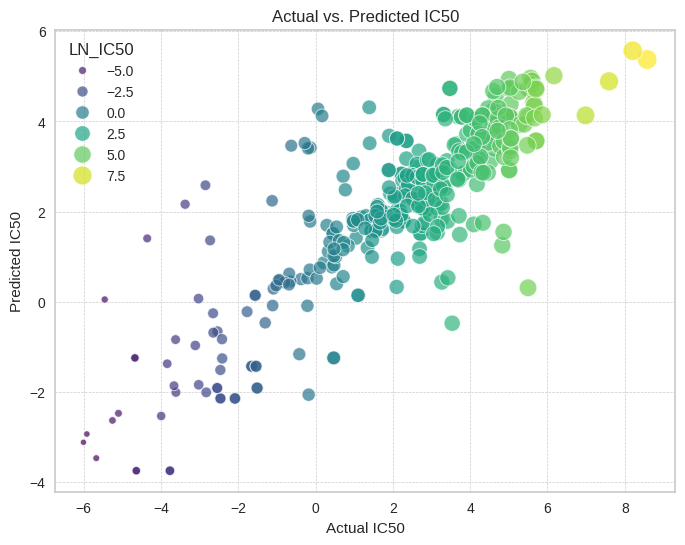

In [60]:
# Create a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LN_IC50', y='Predicted_IC50', data=df_final, alpha=0.7, hue='LN_IC50', palette='viridis', size='LN_IC50', sizes=(20, 200))
plt.xlabel('Actual IC50')
plt.ylabel('Predicted IC50')
plt.title('Actual vs. Predicted IC50')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [61]:
# Generate the correlation coefficient for the scatter plot
correlation_coefficient = df_final['LN_IC50'].corr(df_final['Predicted_IC50'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.8547430059853028
